In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hoja de Trabajo 11
## Problema 7:
Considere un bloque sin fricción conectado a un resorte con frecuencia natural $\omega_0 = 2\pi$, que se libera desde el reposo en $x_0 = 1$ y $t = 0$. En el notebook adjunto, trace la posición $x_{(t)}$ para $0 < t < 2$ y para las constantes de amortiguamiento, $\beta = 0$, $1$, $2$, $4$, $6$, $2\pi$, $10$ y $20$. (Recuerde que $x_{(t)}$ viene dada por fórmulas diferentes para, $\beta < \omega_0$, $\beta = \omega_0$ y $\beta > \omega_0$) y describa el comportamiento.

In [24]:
omega = 2*np.pi
betas = [0, 1, 2, 4, 6, 2*np.pi, 10, 20]
strb = ['0', '1', '2', '4', '6', r'2\pi', '10', '20']
t = np.linspace(0,2,1000)

def equis(time, beta, omega_0=omega):
    if beta < omega_0:
        obar = np.sqrt(omega_0**2-beta**2)
        c1 = (1j*obar+beta)/(2*1j*obar)
        c2 = (1j*obar-beta)/(2*1j*obar)
        # print('soy subamortiguado')
        return np.exp(-beta*t)*(c1*np.exp(1j*obar*time)+c2*np.exp(-1j*obar*time))
    elif beta > omega_0:
        Omega = np.sqrt(beta**2-omega_0**2)
        c1 = (Omega+beta)/(2*Omega)
        c2 = (Omega-beta)/(2*Omega)
        # print('soy recontraamortiguado')
        return c1*np.exp(-(beta-Omega)*time)+c2*np.exp(-(beta+Omega)*time)
    else:
        c1 = 1
        c2 = beta
        # print('la vida de un critico es sencilla en muchos aspectos')
        return c1*np.exp(-beta*time)+c2*time*np.exp(-beta*time)

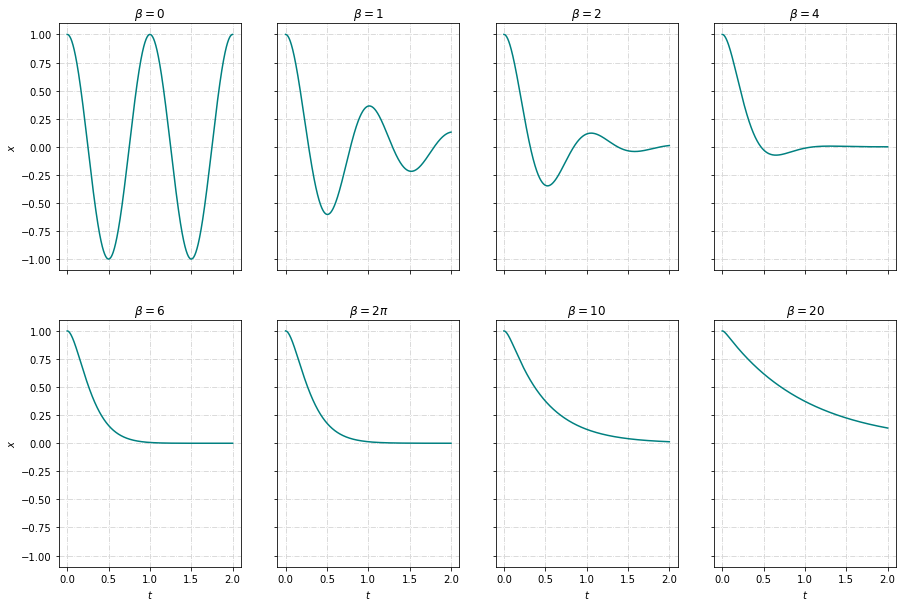

In [28]:
fig, axs = plt.subplots(2,4, sharex=True, sharey=True, figsize=(15,10))

for ax,i in zip(axs.flat,range(8)):
    ax.plot(t,np.real(equis(t,betas[i])), 'teal')
    ax.set_title(f'$\\beta={strb[i]}$')
    ax.grid(linestyle='-.', linewidth=0.8, color='lightgray')
    
plt.setp(axs[-1,:], xlabel='$t$');
plt.setp(axs[:,0], ylabel='$x$');